In [64]:
pip install --upgrade --depsno-deps statsmodels

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\users\sai\appdata\local\programs\python\python38\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\users\sai\appdata\local\programs\python\python38\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\users\sai\appdata\local\programs\python\python38\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\users\sai\appdata\local\programs\python\python38\python.exe -m pip install [options] [-e] <local project path> ...
  c:\users\sai\appdata\local\programs\python\python38\python.exe -m pip install [options] <archive url/path> ...

no such option: --depsno-deps


In [65]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


In [66]:
import statsmodels.api as sm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
advertising=pd.read_csv('D:\\DSWF\\advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


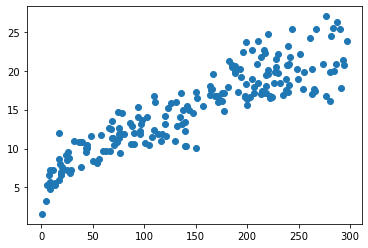

In [7]:
plt.scatter(advertising['TV'],advertising['Sales'])
plt.show()

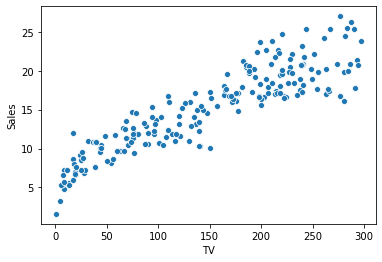

In [8]:
sns.scatterplot(advertising['TV'],advertising['Sales'])
plt.show()

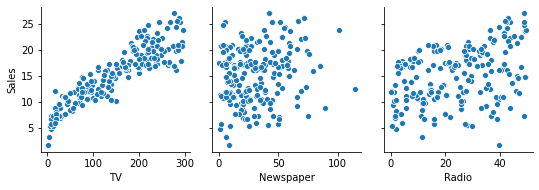

In [9]:
sns.pairplot(data=advertising, x_vars=['TV','Newspaper','Radio'], y_vars='Sales',kind='scatter')
plt.show()

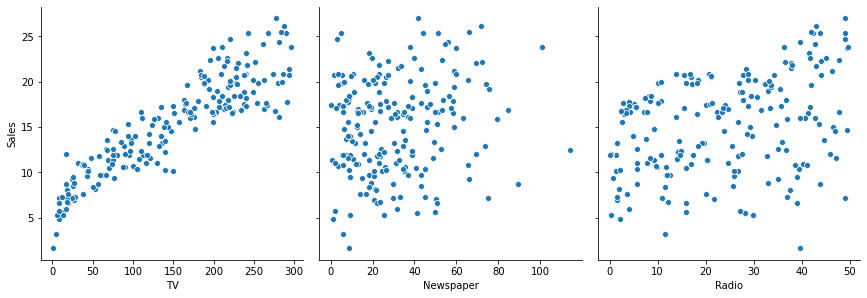

In [10]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

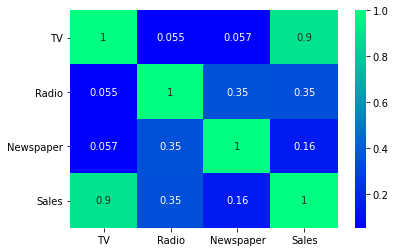

In [11]:
sns.heatmap(advertising.corr(),cmap='winter',annot=True)
plt.show()

In [12]:
x=advertising['TV']
y=advertising['Sales']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [14]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [16]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [17]:
advertising['TV'].head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [18]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [19]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [20]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        13:02:00   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

<function matplotlib.pyplot.show(*args, **kw)>

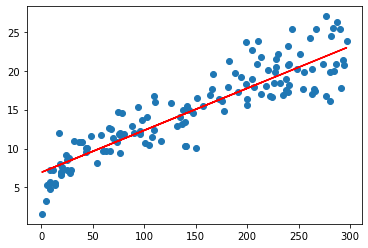

In [21]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show

In [22]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train-y_train_pred)

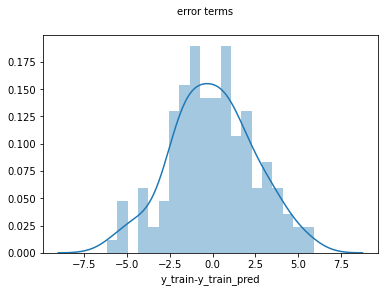

In [23]:
plt.figsize=(10,10)
sns.distplot(res,bins=20)
plt.suptitle('error terms',fontsize=10)
plt.xlabel('y_train-y_train_pred',fontsize=10)
plt.show()

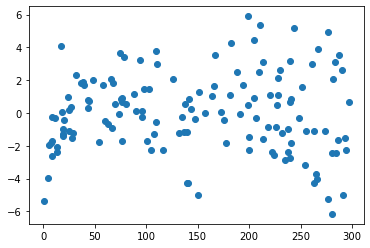

In [24]:
plt.scatter(x_train,res)
plt.show()

In [25]:
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)

In [26]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
MSE=np.sqrt(mean_squared_error(y_test,y_pred))
MSE

2.019296008966232

In [29]:
r_squared=r2_score(y_test,y_pred)
r_squared


0.792103160124566

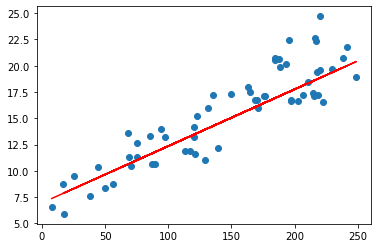

In [30]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.948 + 0.054*x_test,'r')

In [31]:
from sklearn.model_selection import train_test_split
x_train_lm,x_test_lm,y_train_lm,y_test_lm=train_test_split(x,y,train_size = 0.7,test_size=0.3,random_state=100)

In [32]:
x_train_lm.shape

(140,)

In [33]:
x_train_lm=x_train_lm.values.reshape(-1,1)
x_test_lm=x_test_lm.values.reshape(-1,1)

In [34]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [38]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train_lm,y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [40]:
corrs=np.corrcoef(x_train,y_train)
corrs

array([[1.        , 0.90321277],
       [0.90321277, 1.        ]])

In [42]:
corrs[0,1]**2

0.8157933136480386

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
x_train_scaled = x_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [49]:
x_train_scaled.shape

(140, 1)

In [52]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_scaled)
y_train_scaled=scaler.fit_transform(y_train_scaled)

In [54]:
print('mean and std deviation for x train :',np.mean(x_train_scaled),np.mean(x_train_scaled))
print('mean and std deviation for y train :',np.mean(y_train_scaled),np.mean(y_train_scaled))

mean and std deviation for x train : 2.5376526277146434e-17 2.5376526277146434e-17
mean and std deviation for y train : -2.5376526277146434e-16 -2.5376526277146434e-16


In [55]:
x_train_scaled=sm.add_constant(x_train_scaled)
lr_scaled=sm.OLS(y_train_scaled,x_train_scaled).fit()

In [59]:
lr_scaled.params

array([-2.44596010e-16,  9.03212773e-01])

In [61]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        13:20:38   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.0

In [63]:
lr_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        13:20:55   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.000      -0.072       0.072
x1             0.9032      0.037     24.722      0.000       0.831       0.975
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""